# Artigo 5 - Identificado de Números

## Autor 
Nome: Danilo César Tertuliano Melo

Matrícula: 221031149

Github: DaniloCTM

----

## Obejtivo

Este artigo busca criar um modelo para resolver o problema de reconhecimento de digito da competição [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer) com o famoso dataset MNIST. Para isso foi utilizado a segunda parte do conteúdo da aula 5 do Jeremy.

# Passo 1 - Configurando o Ambiente

Começamo instalando algumas bibliotecas e o dataset

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Para obter o dataset foi utilizado a biblioteca sklearn

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

# Passo 2 - Organizando os Dados

Para organizar os dados o vetor das imagens foi colocado na variável X e os valores com o target foram colocados na variável y.

In [148]:
X,y = mnist["data"], mnist["target"]

In [149]:
y = y.astype(np.uint8)

Foi criado duas pastas para dividir os dados de treinamento e teste

In [ ]:
!mkdir 'trainData'
!mkdir 'testeData'

In [ ]:
train_data = "./trainData/" 
teste_data = "./testeData/"

# Passo 3 - Explorando os Dados

Nessa etapa dividimos o conjunto de dados em treinamento e teste

In [151]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

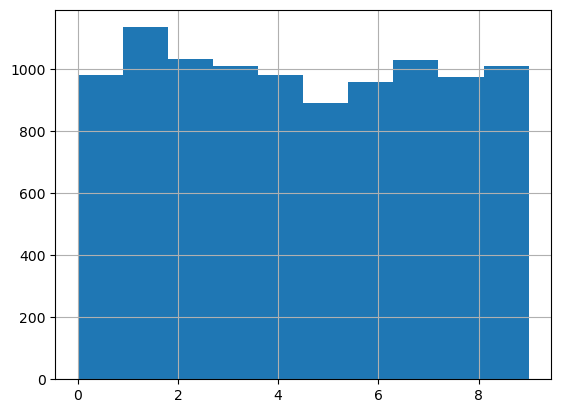

In [155]:
y_test.hist();

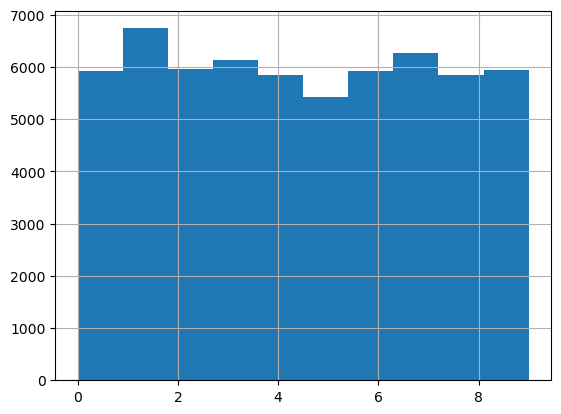

In [156]:
y_train.hist();

Por meio dos histogramas acima é possível perceber que os dados estão bem distribuidos nos dois datasets.

# Passo 4 - Convertendo o CSV para Imagem

Foi utilizado a biblioteca Matplotlib para converter o arquivo csv para png.

In [ ]:
#dataset de treino
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

index = 0
for digit in X[:60000]:
    some_digit = digit
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.imsave(f"{train_data}{index}.png", some_digit_image)
    index += 1

O mesmo foi feito para os dados de teste

In [ ]:
#dataset de teste
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

index = 60000
for digit in X[60000:]:
    some_digit = digit
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.imsave(f"{teste_data}{index}.png", some_digit_image)
    index += 1

# Passo 5 - Criando o Modelo

In [15]:
from fastai.vision.all import *

In [17]:
def get_y(r):
    number = ''.join(filter(str.isdigit, str(r)))
    return train_y[int(number)]

Definimos o dataBlock para receber imagens e retornar uma categoria.

In [19]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_items = get_image_files,
    get_y = get_y
).dataloaders(train_data, bs=128)

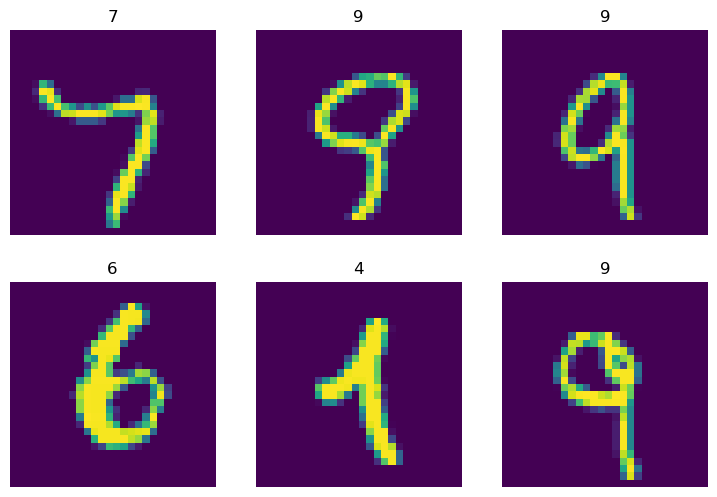

In [20]:
dblock.show_batch(max_n=6)

In [ ]:
learnResnet50 = vision_learner(dblock, resnet50, metrics = error_rate)

# Passo 6 - Treinando o Modelo

Para o treinamento foi realizado um treinamento com 3 épocas, com essa quantidade ele chegou em um erro rate baixo. O modelo foi testado com mais épocas mas não teve uma melhora significativa.

In [22]:
learnResnet50.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.874533,0.591513,0.192917,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.138253,0.091676,0.029333,01:34
1,0.061175,0.051517,0.014750,01:34
2,0.016556,0.043635,0.012333,01:33


# Passo 7 - Avaliando o Modelo

Agora realizamos o teste de 100 amostras do dataset de teste.

In [ ]:
prediction = []
for i in range(100):
    dest = f"/kaggle/working/testeData/{i+60000}.png"
    preds, _,prob = learnResnet50.predict(PILImage.create(dest));
    prediction.append(preds);

In [199]:
correct = y_test[:100].values
prediction = [int(p) for p in prediction[:100]]
result = [str(a == b) for a, b in zip(correct, prediction)]

Criamos uma tabela para comparar os valores esperados com os valores gerados pelo modelo

In [205]:
df = pd.DataFrame({'Correct': y_test[:100], 'Prediction': prediction[:100], 'Result': result})
df

,Correct,Prediction,Result
60000,7,7,True
60001,2,2,True
60002,1,1,True
60003,0,0,True
60004,4,4,True
...,...,...,...
60095,4,4,True
60096,1,1,True
60097,7,7,True
60098,6,6,True


In [204]:
count_false = df['Result'].value_counts()['False']
print(count_false)

2


O modelo teve um desempenho bom, pois ele errou apenas dois testes, então teve uma acuracia de 98%

Testando apenas um valor:

In [215]:
dest = "/kaggle/working/testeData/60323.png"
preds, _,prob = learnResnet50.predict(PILImage.create(dest));
print(f'Esse é o número {preds}')
im = Image.open(dest)
im.to_thumb(256,256)

Esse é o número 3


# Fazendo Deploy do Modelo

Por fim, o modelo foi colocado no Fugging Face e pode ser acessado [aqui](https://huggingface.co/spaces/DaniloTertu/Lesson-5?logs=build).

In [214]:
learnResnet50.export('model.pkl')

# Conclusão
No geral o modelo teve um bom desempenho, no entanto ele não conseguiu se adaptar muito bem a ferramenta sketchpad do hugging face. Acredito que esse problema seja causado pois é utilizada uma cor diferente da do treinamento. Nesse artigo também foi possível verificar a importancia de definir bem o conjunto de treinamento, para isso foi usado a função hist() para verificar se o conjundo estava bem dividido.